<h1>MACHINE LEARNING PROJECT </h1>
<h2>Predicting the progression of diabetes based on different demographic determinants using Machine learning Algorithms</h2>

<p>The goal of this project is to use different machine learning models to predict the progression of diabetes one year after baseline. There are 10 independent variables that are used for the prediction of the disease progression namely- age, sex, body-mass index, average blood pressure, and six blood serum measurements: low density lipoproteins (LDL), high density lipoproteins (HDL), total cholesterol (TC), triglyceride (TG), serum concentration of lamotrigine (LTG), glucose (GLU). The data was originally used in <a href= 'https://projecteuclid.org/euclid.aos/1083178935'>Lars Paper</a> and has been scraped off from the following <a href ='https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data'>website</a> using beautiful soup library and then it is finally read in to a text file. The text file is then converted in to excel file and is then read in to a pandas dataframe.</p>

<p>The data set has been normalized to have zero mean and variance of 1 and split in to training set and test set. The model is evaluated on the test set. Different models are evaluated that reduces the error or cost in predicting the correct output response varible (progression in diabetes in 1 year) such as:
    <ul>
    <li> Linear Regression with single Variable </li>
    <li> Linear Regression with Multiple Variables </li>
    <li> Polynomial Regression (Regularized and Unregularized) </li>
    </ul>
The training set is used for training the model. After the model is fitted on the training set, it is evaluated on both the training set and the test set.
The model with the lowest cost or error in the test data set is concluded as the final model to be used for prediction of response variable. </p>

### Data Wrangling:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe

In [2]:
import json # library to handle JSON files
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents


In [3]:
url='https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data'
r=requests.get(url)
soup=BeautifulSoup(r.content,'lxml')

In [4]:
table = soup.find('p')

with open('sound', 'w') as f:
    f.write(table.text)


In [6]:
#The data from txt file has been saved in to an excel file sound.xlsx and will be read in to a pandas dataframe
df = pd.read_excel('sound.xlsx')

In [7]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Checking the size of the dataframe. There are 442 rows (training examples) and 11 columns with 1 being the output response variable (disease progression one year after baseline). The remaining 10 columns are other 10 input features used for predicting the response variable.
The 10 features are:
1. AGE
2. SEX
3. BMI (Body mass index)
4. BP  (Blood pressure)
5. S1  (Blood serum concentration 1): low density lipoproteins (LDL)
6. S2  (Blood serum concentration 2): high density lipoproteins (HDL)
7. S3  (Blood serum concentration 3): total cholesterol (TC)
8. S4  (Blood serum concentration 4): triglyceride (TG)
9. S5  (Blood serum concentration 5): serum concentration of lamotrigine (LTG)
10. S6 (Blood serum concentration 6): glucose (GLU)

In [8]:
df.shape #checks the size of the data frame

(442, 11)

Checking the information about the dataframe which gives details about the number of columns, column names and their datatypes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [10]:
df= df.astype('float64') #converted all the values to float in the dataframe

A new column has been created namely 'agegrp' where each individual training example has been grouped in to a specific age group.

In [11]:
df['AGE'].max()

79.0

In [12]:
df['AGE'].min()

19.0

In [13]:
df["agegrp"] = pd.cut(df['AGE'], [19, 30, 40, 50, 60, 70, 80])


In [14]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,agegrp
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,"(50, 60]"
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,"(40, 50]"
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,"(70, 80]"
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,"(19, 30]"
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,"(40, 50]"


In [15]:
df['SEX'] = df['SEX'].replace({1.0: 'Male', 2.0: 'Female'})
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,agegrp
0,59.0,Female,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,"(50, 60]"
1,48.0,Male,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,"(40, 50]"
2,72.0,Female,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,"(70, 80]"
3,24.0,Male,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,"(19, 30]"
4,50.0,Male,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,"(40, 50]"


In [16]:
#ONE HOT ENCODING ON THE SEX COLUMN
one_hot = pd.get_dummies(df['SEX'])
one_hot.head()
df = pd.concat([df,one_hot], axis = 1)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,agegrp,Female,Male
0,59.0,Female,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0,"(50, 60]",1,0
1,48.0,Male,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0,"(40, 50]",0,1
2,72.0,Female,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0,"(70, 80]",1,0
3,24.0,Male,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0,"(19, 30]",0,1
4,50.0,Male,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0,"(40, 50]",0,1


### Data Visualization and Exploraroy Analysis

#### Distribution of Blood pressure in different sex:

The boxplot below shows the distribution of blood pressure in males and females.
In the SEX column 2 represents female and 1 represents male. We can see that blood pressure in female tends to be higher than in male.
However males do tend to have some outliers after 130mmHg

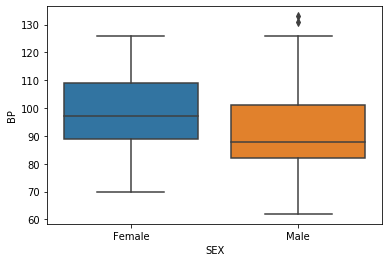

In [17]:
sns.boxplot(x = 'SEX', y = 'BP', data = df)

#### Distribution of BMI in different sex across different age groups:

The BMI in females tends to be higher than in males. However, the males shows larger variation in their distribution for the BMI as compared to females in earlier age groups specially between 30s and 50s.

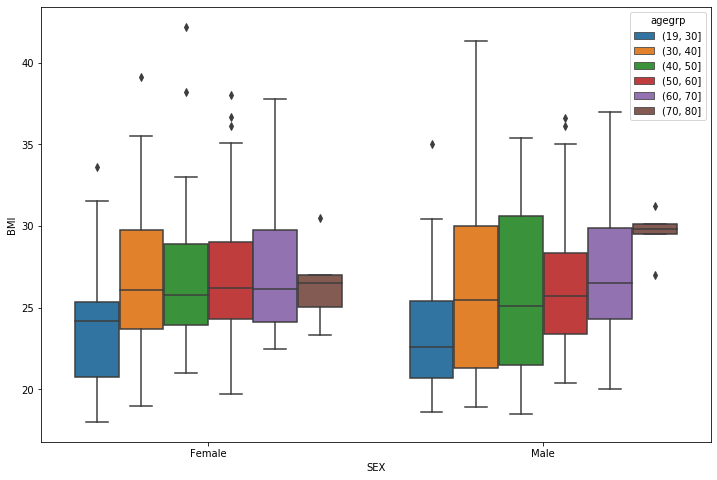

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'SEX', y = 'BMI', data = df, hue = 'agegrp')

#### Distribution of diabetes progression one year after baseline in different sex across different age groups:

Males tend to show higher progression of diabetes in the earlier age groups from 20s to 50s whereas females show higher progression of diabetes in later age groups from 50s to 80s.

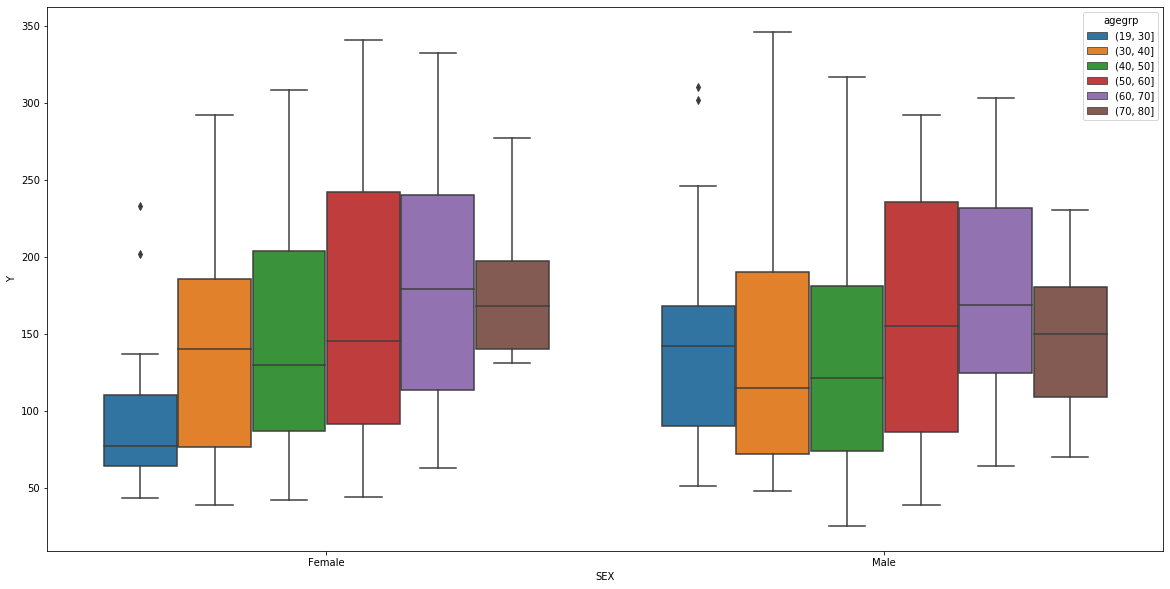

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'SEX', y = 'Y', data = df, hue = 'agegrp')

Age does not seem to show a strong linear relationship with response variable

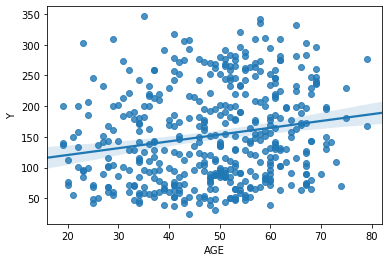

In [20]:
sns.regplot(x='AGE', y= 'Y', data = df)

From the scatter plot we can observe that as the blood serum concentration increases  the progression in disease also increases.

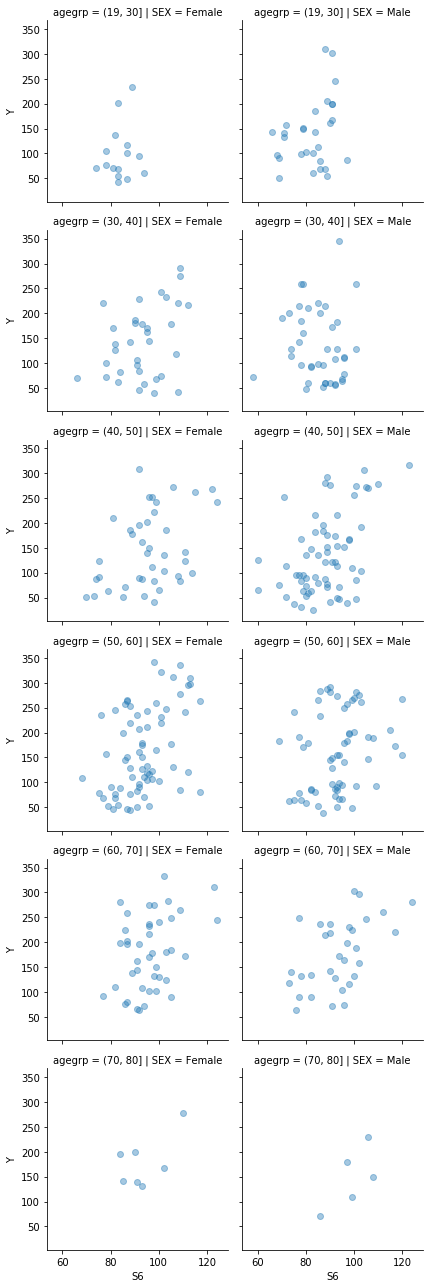

In [21]:
sns.FacetGrid(row='agegrp', col= 'SEX', data = df).map(plt.scatter, 'S6', 'Y', alpha = 0.4).add_legend()

There seems to be a linear relationship between Body mass index and diabetes progression after one year. Also the distribution of BMI and response variable disease progression seem to have a rightward skew.

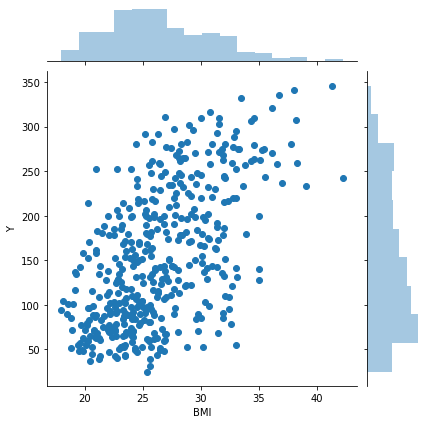

In [22]:
sns.jointplot(x='BMI', y = 'Y', data =df)

Again the relationship between BP and disease progression seems to be linear from the scatter plot. 
The distribution of BP seems to be normal. However distribution of disease progression is skewed right showing that few people tend to show much higher progression of diabetes.

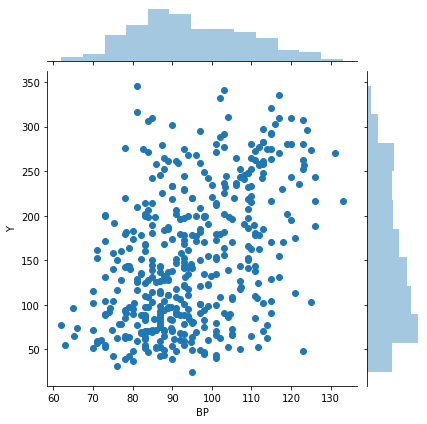

In [23]:
sns.jointplot(x = 'BP', y= 'Y', data = df)

The heat map below shows the correlation coefficient between each of the different variables. From the heat map below, there seems to be higher correlation between the variables- Y (disease progression) and blood serum concentration S5, S4 and S6. Also a strong correlation is observed between disease progression and BMI followed by BP.

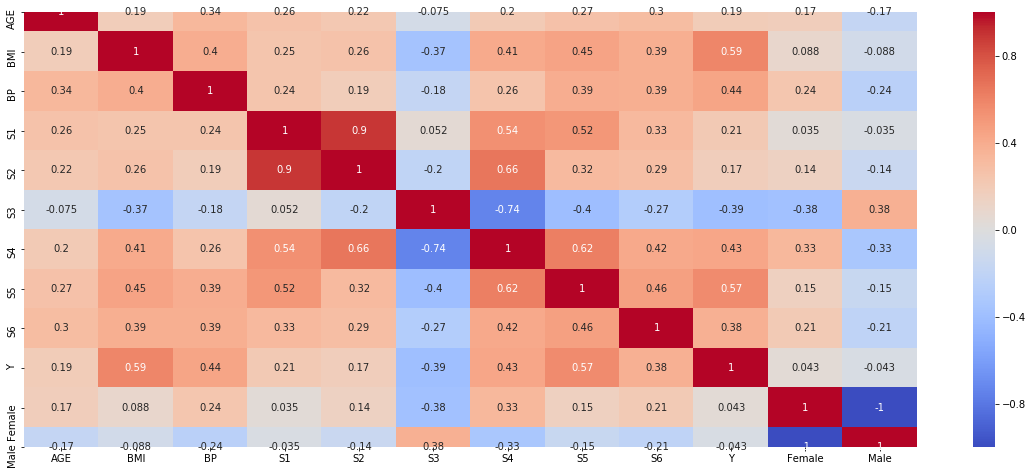

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot= True)

There is negative correlation between blood serum concentration S3 and disease progression.

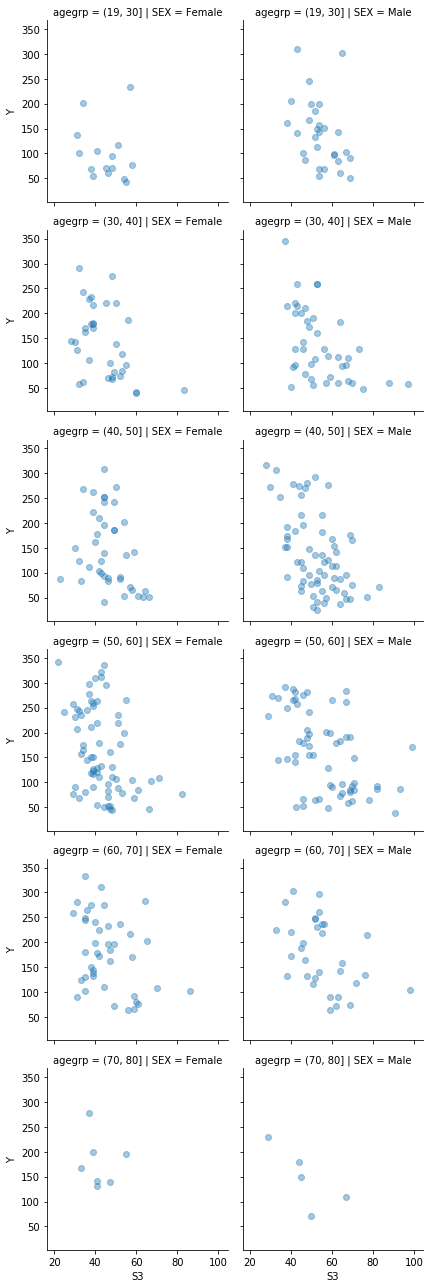

In [25]:
sns.FacetGrid(row='agegrp', col= 'SEX', data = df).map(plt.scatter, 'S3', 'Y', alpha = 0.4).add_legend()

### Applying Machine Learning Algorithms to find the best fitting model to predict future Outcomes:

Now we will use Machine learning Algorithms to make an appropriate model that can predict the progression of diabetes after one year based on different demographic determinants used in the study.
Any variable not used in prediction of the response variable has been dropped such as 'agegrp'.
The Data has been normalized to have zero mean and variance 1.

In [26]:
df =  df.drop(['agegrp', 'SEX'], axis = 1)

In [27]:
y_data = df['Y']
X_data = df.drop(['Y'], axis = 1)
print(X_data.shape, y_data.shape)

(442, 11) (442,)


Next we split the Data set in to training and test data using the function train_test_split from sklearn library. The test data comprises 10% of the entire training set.

In [28]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.45, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 199
number of training samples: 243


#### Function used for plotting distribution plots of the predicted value for the response variable and the actual value of the response variable.

In [29]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.show()
    plt.close()

### Using Single Variable Linear Regression Model for training the training data:
BMI is used as the single feature for predicting the response variable for the prediction of the disease progression in one year after baseline as it showed the highest correlation with the response variable.

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
x_train.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Female,Male
223,21.0,24.2,76.0,147.0,77.0,53.0,3.0,4.4427,79.0,0,1
412,69.0,34.3,113.0,200.0,123.8,54.0,4.0,4.7095,112.0,0,1
415,47.0,27.2,80.0,208.0,145.6,38.0,6.0,4.8040,92.0,0,1
145,37.0,38.3,113.0,165.0,94.6,53.0,3.0,4.4659,79.0,0,1
238,58.0,25.5,112.0,163.0,110.6,29.0,6.0,4.7622,86.0,1,0


In [32]:
#Using a single variable 'BMI' to predict the response variable which is the progression of diabetes after one year.
#The 'BMI' column has been filtered out in an array bmi_dat for both the training set and test set
bmi_dat = np.asarray(x_train['BMI']).reshape(-1,1)
#Normalizing the bmi_dat column
bmi_dat = (bmi_dat - np.mean(bmi_dat))/np.std(bmi_dat)
bmi_dat[0:5]

array([[-0.54074003],
       [ 1.70864684],
       [ 0.12739468],
       [ 2.59949312],
       [-0.25121499]])

In [33]:
bmi_dat_test = np.asarray(x_test['BMI']).reshape(-1,1)
#Normalizing the bmi_dat column
bmi_dat_test = (bmi_dat_test - np.mean(bmi_dat_test))/np.std(bmi_dat_test) 
bmi_dat_test[0:5]

array([[-0.62082907],
       [-0.80699593],
       [ 2.07859044],
       [-1.34222566],
       [ 0.19365096]])

Creating the LinearRegression object:

In [34]:
lr = LinearRegression() 

Fitting the training set to the LinearRegression object:

In [35]:
lr.fit(bmi_dat,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Evaluation:
Rsquared value and the mean squared error in the model is calculated. Rsquared represents how much variation in the response variable can be explained by the model we used to predict the response variable. <br>
It compares the best fit line to a worse fitted line which is at the mean value of response variable, i.e. it takes the ratio of squared sum of residuals from the best fit line to the squared sum of residuals from the worse fit line. Larger the Rsquared value, better is the fit of our model.<br>
<img src="diab3.JPG" alt="R-squared function" height="200" width="200">

The mean squared error is the mean of the squared difference in the actual response value from the predicted response value. It shows how close are the data points to the best fit line. Smaller the mean squared error, better is the fit of out model.
<img src="diab4.JPG" alt="Mean squared function" height="150" width="150">
Both In sample Evaluation and Out of Sample Evaluation has been performed. In sample evaluation is performed by calculating the Rsquared value and mean squared error on the training set after the model gets trained on the train set. The out of sample evaluation is performed on the test set.

Predicting the output for training data set:

In [36]:
ypred = lr.predict(bmi_dat) 

The Rsquared value for the training data set:

In [37]:
lr.score(bmi_dat, y_train)

0.4007148621523915

Checking the Rsquared value for the test data set:

In [38]:
lr.score(bmi_dat_test, y_test) 

0.2191486064988386

Checking the mean squared error for the training and test data set using mean_squared_error function from the metrics module of the sklearn library.

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
mse(y_train, ypred) #Mean squared error for the training set

3865.78563815627

Predicting output for the test data set and calculating the mean squared error:

In [41]:
ypred_test = lr.predict(bmi_dat_test)

In [42]:
mse(y_test, ypred_test)

4100.220636803845

#### We observe a small value of Rsquared and quite big of a mean squared error for both test set and train set. 
This shows that the model used for predicting the response variable is not a good one. From the distribution plot of actual training set response values compared to the predicted response values, we can see a quite a difference. Therefore, we use another model which is the multivariable linear regression model where multiple variables are used to predict the output response.

<Figure size 360x360 with 0 Axes>

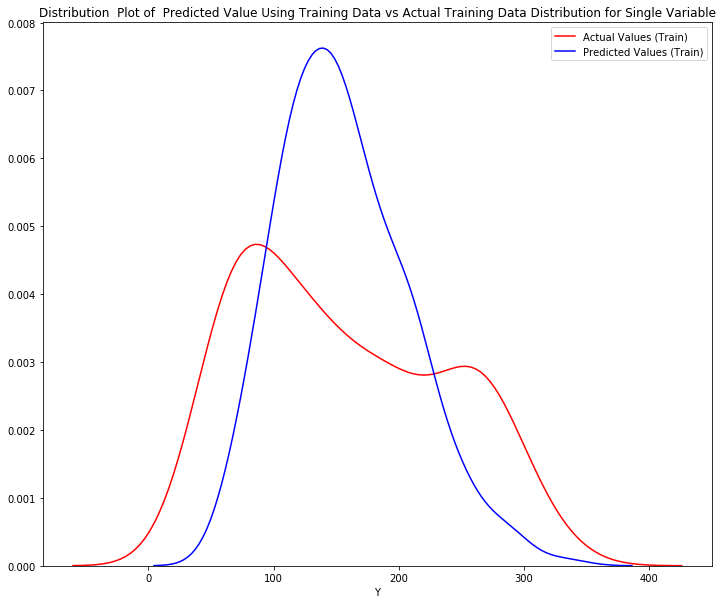

In [43]:
plt.figure(figsize=(5,5))
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Actual Training Data Distribution for Single Variable'
DistributionPlot(y_train, ypred, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

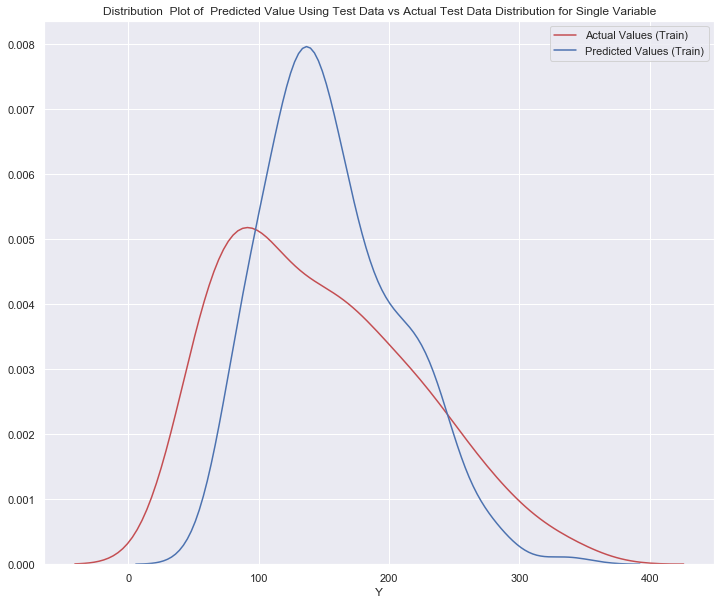

In [44]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Actual Test Data Distribution for Single Variable'
DistributionPlot(y_test, ypred_test, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

### MultiVariable Linear Regression

We use StandardScaler function from the sklearn library to normalize the training set and test set.

In [45]:
from sklearn import preprocessing
Scale = preprocessing.StandardScaler()

In [46]:
x_train = Scale.fit(x_train).transform(x_train)
x_train[0:5]

array([[-2.10783482, -0.54074003, -1.4584432 , -1.21336573, -1.27154475,
         0.2622917 , -0.80415785, -0.3443298 , -1.07905121, -0.91701095,
         0.91701095],
       [ 1.52320718,  1.70864684,  1.26320836,  0.33309021,  0.31322138,
         0.3439533 , -0.02918122,  0.13378136,  1.77669521, -0.91701095,
         0.91701095],
       [-0.14102041,  0.12739468, -1.1642106 ,  0.56651752,  1.05142441,
        -0.96263238,  1.52077205,  0.30312733,  0.0459398 , -0.91701095,
         0.91701095],
       [-0.89748749,  2.59949312,  1.26320836, -0.68815428, -0.67556433,
         0.2622917 , -0.80415785, -0.30275491, -1.07905121, -0.91701095,
         0.91701095],
       [ 0.69109338, -0.25121499,  1.18965021, -0.74651111, -0.13376394,
        -1.69758683,  1.52077205,  0.22822086, -0.47328682,  1.09049951,
        -1.09049951]])

In [47]:
x_test = Scale.fit(x_test).transform(x_test)
x_test[0:5]

array([[ 9.20892280e-01, -6.20829066e-01, -1.18572186e+00,
         1.63766648e+00,  1.00405237e+00,  1.11049187e+00,
        -2.41060622e-01,  1.02676740e+00, -1.22967752e+00,
        -9.65421584e-01,  9.65421584e-01],
       [-1.63187243e+00, -8.06995928e-01, -1.59229120e+00,
        -2.11418583e+00, -2.33264724e+00,  4.53441676e-01,
        -1.64054060e+00, -4.86870140e-01, -1.05407233e+00,
        -9.65421584e-01,  9.65421584e-01],
       [-1.47715942e+00,  2.07859044e+00,  3.67416060e-01,
         4.06142438e-01,  8.31794453e-01,  1.54082123e-02,
        -2.33637361e-02, -1.27999932e+00, -4.41219058e-04,
        -9.65421584e-01,  9.65421584e-01],
       [-4.71524836e-01, -1.34222566e+00, -1.59229120e+00,
        -8.25381602e-01, -1.12684184e+00,  1.18349745e+00,
        -1.64054060e+00, -8.76784859e-01, -8.78467145e-01,
        -9.65421584e-01,  9.65421584e-01],
       [ 8.43535774e-01,  1.93650957e-01,  7.73985403e-01,
         1.19741498e-01,  3.21400632e-01, -4.95630828e-01,
  

Next we create a LinearRegression object and fit the training set to it.

In [48]:
lre=LinearRegression()
lre.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Calculating the Rsquared value for the training set and test set:
We can see that the Rsquared value has improved for the multiple regression value on the training set.

In [49]:
lre.score(x_train, y_train) 

0.5708212163846004

In [50]:
lre.score(x_test, y_test) 

0.38513102571519986

In [51]:
# PREDICTING THE VALUES FOR THE TRAIN SET USING THE FITTED MODEL WITH MULTIPLE LINEAR REGRESSION.
y_hat_train= lre.predict(x_train)
y_hat_train[0:5]

array([124.06591417, 239.60962602, 177.84682047, 243.46420536,
       191.89483153])

We can see below that the mean squared error has improved for the multiple regression model.

In [52]:
mse(y_train,y_hat_train) 

2768.4871075906494

The mean squared error has greatly increased in multiple regression case and Rsqaured value has gone considerably down on the unseen data which is test set. This could be due to overfitting. 

In [53]:
y_hat_test= lre.predict(x_test)
y_hat_test[0:5]

array([132.0773054, 109.1328472, 182.6160224,  62.7406367, 188.2784971])

In [54]:
mse(y_test, y_hat_test) 

3228.6533369543135

The comparison between the distribution plot of actual response values and the predicted response values on the training set is much more comparable than in single variable case. However, there is still some difference observed near the peak and on the right side of the distribution plot.

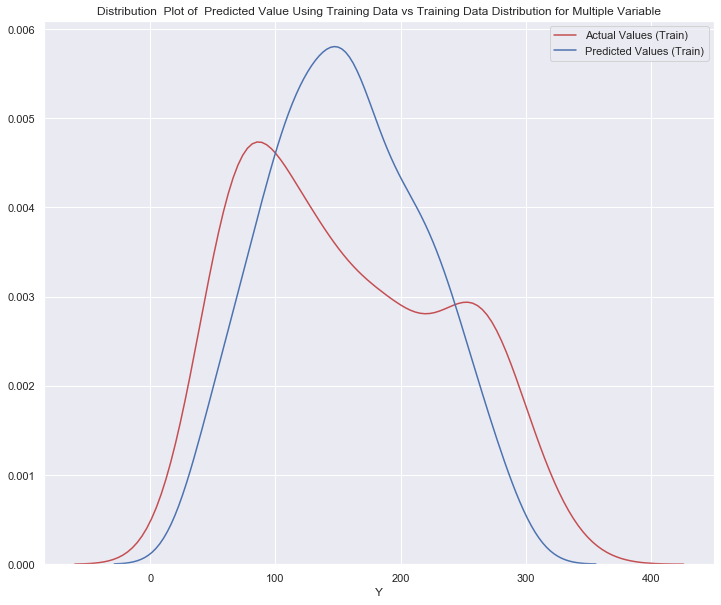

In [55]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution for Multiple Variable'
DistributionPlot(y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

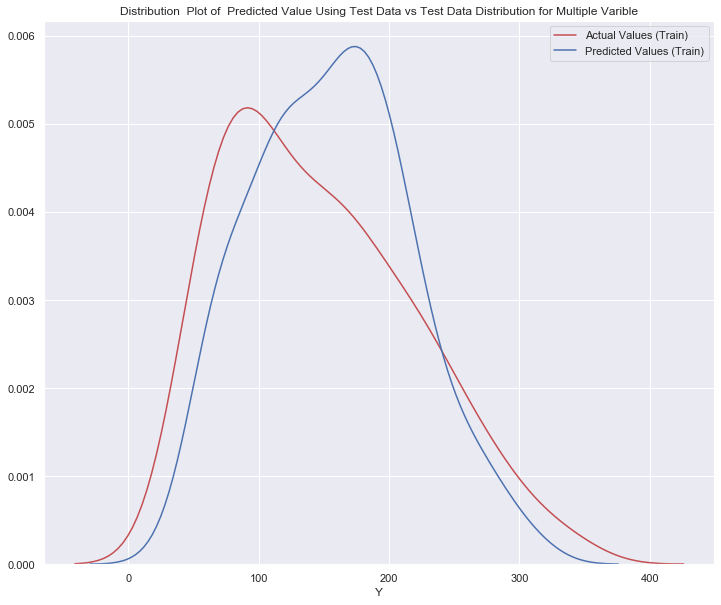

In [56]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution for Multiple Varible'
DistributionPlot(y_test, y_hat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

For better estimation of error for a Generalized model where the error can be generalized on new unseen examples, it is important to use cross_val_score method from sklearn library where the input feature data set (X_data) gets divided in to 4 equal sized folds where each fold gets selected as the test test and the Rsquared value is calculated for each fold.

In [57]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, X_data[['BMI', 'BP','S4', 'AGE', 'Female', 'Male', 'S5', 'S6', 'S1', 'S2', 'S3']], y_data, cv=4)

In [58]:
Rcross

array([0.37459248, 0.49678312, 0.50950026, 0.55755577])

To get a more realistic value for Rsquared and mean squared error for a model that generalizes for new unseen examples, we use cross_val_score method from the sklearn library.

In [59]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.48460790751271476 and the standard deviation is 0.06744006563276998


In [60]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,X_data[['BMI', 'BP','S4', 'S5', 'AGE', 'Female', 'Male', 'S6','S1', 'S2', 'S3']], y_data,cv=4)
yhat[0:5]

array([209.3775214 ,  63.27512025, 180.31456427, 164.38818861,
       128.69376717])

In [61]:
MSE =-1 * cross_val_score(lre,X_data[['BMI', 'BP','S4', 'S5', 'AGE', 'Male', 'Female', 'S6','S1', 'S2', 'S3']], y_data,cv=4,scoring='neg_mean_squared_error')
MSE

array([2977.93000778, 3078.81148592, 3057.70813441, 2732.38842126])

In [62]:
print('The average mean squared error is %.4f'% MSE.mean())

The average mean squared error is 2961.7095


### Polynomial Regression Model:

In the multivariable linear regression model, the value of R-squared and mean squared error has definitely improved from the single variable linear regression model. However, from the distribution plot, we can still see that the predicted response values still differ to some extent from the actual output response values in both train set and test set. We will therefore, use another model for reducing the error in the model which is Polynomial Regression where we take higher degree polynomial terms of the input features to make a better model and reduce the error.
We use a 5 degree term.
Creating a PolynomialFeatures object using the estimator/ function PolynomialFeatures(), we transform the data set in to a higher order polynomial feature data set adding extra features with higher order polynomial terms of the input features in the data set.

In [63]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [64]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the output of the training set:

In [65]:
yhat_pr_train = poly.predict(x_train_pr)
yhat_pr_train[0:5]

array([150., 261., 174., 259., 257.])

In [66]:
y_train[0:5]

223    150.0
412    261.0
415    174.0
145    259.0
238    257.0
Name: Y, dtype: float64

Predicting the output of the test set:

In [67]:
yhat_pr = poly.predict(x_test_pr)
yhat_pr[0:5]

array([207.22221203, 426.53946936, 169.05620175, 101.23979292,
       180.59877399])

Calculating Rsquared for the Polynomial model on training and test set:
Rsquared value for Polynomial model on the training set has greatly improved compared to multiple regression model.

#### We have got a perfect R-squared value of 1.0 whereas in the multiple linear regression model, were getting 0.53.

In [68]:
poly.score(x_train_pr, y_train) 

1.0

Mean squared error has also improved significantly and has decreased a lot in the polynomial model.

In [69]:
mse(yhat_pr_train, y_train) 

4.37440660659606e-24

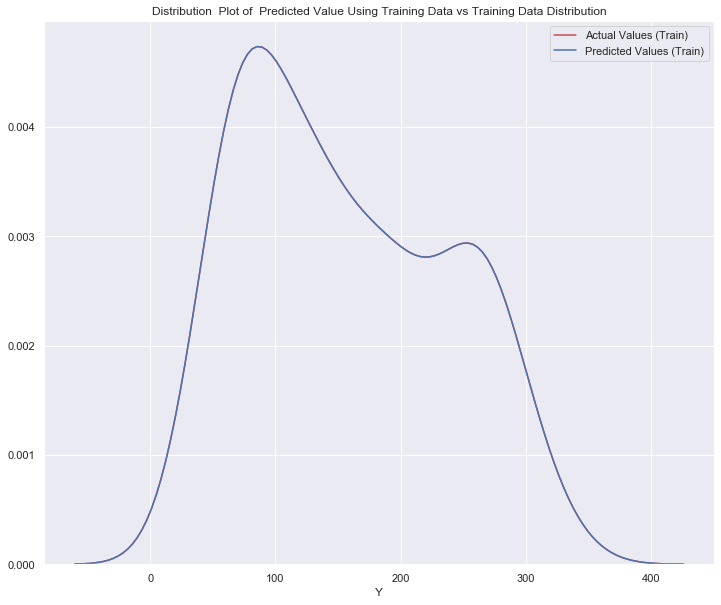

In [70]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_pr_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

The model definitely seems to do very well on the training set the predicted response completely overlapping the actual response

#### How to find the best degree of Polynomial to use?
A plot of mean squared error vs different degree of polynomial terms is used for finding the best degree of polynomial for fitting the model to the data. 

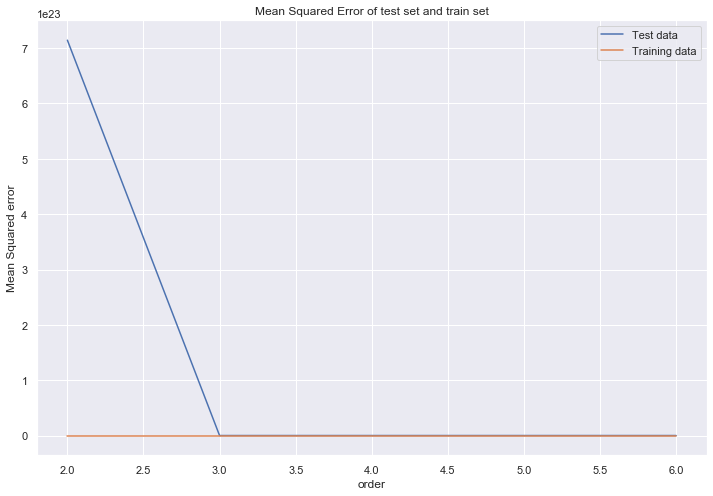

In [71]:
mse_test = []
mse_test1 = []

order = [2,3,4,5,6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    poly.fit(x_train_pr, y_train)
    yhat_train = poly.predict(x_train_pr)
    yhat_test = poly.predict(x_test_pr)
    mse_test.append(mse(yhat_train, y_train))
    mse_test1.append(mse(yhat_test, y_test))
plt.figure(figsize=(12,8))
plt.plot(order, mse_test1, label = 'Test data')
plt.plot(order, mse_test, label = 'Training data')
plt.xlabel('order')
plt.ylabel('Mean Squared error')
plt.title('Mean Squared Error of test set and train set')
#plt.text(3, 0.75, 'Maximum R^2 ')   
plt.legend()

In [72]:
print('Mean squared error of the train set')
print(mse_test)
print('--------------------')
print('Mean squared error of the test set')
print(mse_test1)

Mean squared error of the train set
[2125.8691254760993, 2.50284672813662e-23, 1.1259279379353259e-24, 4.37440660659606e-24, 6.092016904505335e-23]
--------------------
Mean squared error of the test set
[7.144077379277242e+23, 1242317.8433057112, 46278.192651560224, 51660.72584263945, 330848.89141124627]


#### We can see from above plot and the mean squared error values for different polynomial order terms that best nth degree term is the 4th degree polynomial term when the Mean squared error is small for both test set and train set.

In [73]:
pr = PolynomialFeatures(degree=4)
    
x_train_pr = pr.fit_transform(x_train)
    
x_test_pr = pr.fit_transform(x_test)    
    
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
yhat_train = poly.predict(x_train_pr)

In [75]:
yhat_test = poly.predict(x_test_pr)

#### The R-squared value of the training set for the Polynomial model with 4 degree term.

In [76]:
poly.score(x_train_pr, y_train) 

1.0

#### The mean squared error of the training set for the Polynomial model with 4 degree term

In [77]:
mse(yhat_train, y_train) 

1.1259279379353259e-24

#### The Rsquared value is very small and negative and the mean squared error is very large compared to multivariable linear regression model and therefore does not show a good fit on the test data.

In [78]:
poly.score(x_test_pr, y_test)

-7.813279679713679

In [79]:
mse(yhat_test,y_test) 

46278.192651560224

The mean squared error is extremely large on the test data and Rsquared is very small.
The model performs very poorly on the test data set as compared to the multivariable linear regression model. This shows that even though our model fits exteremly well on the training set, it fails to generalize over new unseen examples. We can therefore, observe that the model suffers from overfitting due to additional features added with the higher order polynomial terms. This shows that our model is now capturing the noise in the data leading to overfitting of the model and high variance.
The distribution plot of predicted response value on the test data set shows huge difference from the actual value.

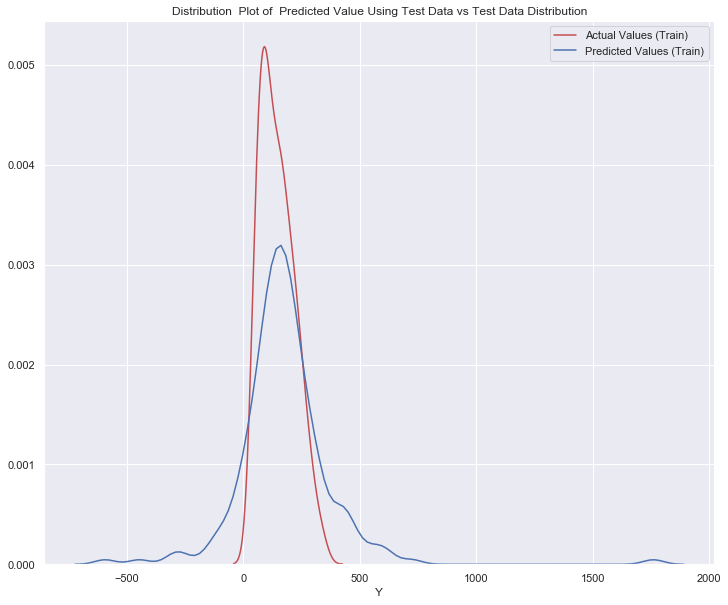

In [80]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

### Overfitting (High Variance in the model):

To overcome the problem due to overfitting, we use Regularization to reduce the weights/ parameters associated with each varaible by using a regularization parameter called as alpha. To select the optimum regularization parameter that will reduce the effect of overfitting but at the same time increase the accuracy of our model to generalize well on the new unseen examples, we make a plot of the mean squared error vs the alpha values to find out the right alpha where the mean squared error is small for test set and train set.

In [81]:
from sklearn.linear_model import Ridge
mse_test = []
mse_train = []
ALFA = 10 * np.array(range(0,100))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    yhat_pr_train= RigeModel.predict(x_train_pr)
    yhat_pr_test = RigeModel.predict(x_test_pr)
    mse_test.append(mse(yhat_pr_test, y_test))
    mse_train.append(mse(yhat_pr_train, y_train))

C:\Users\Gauri\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


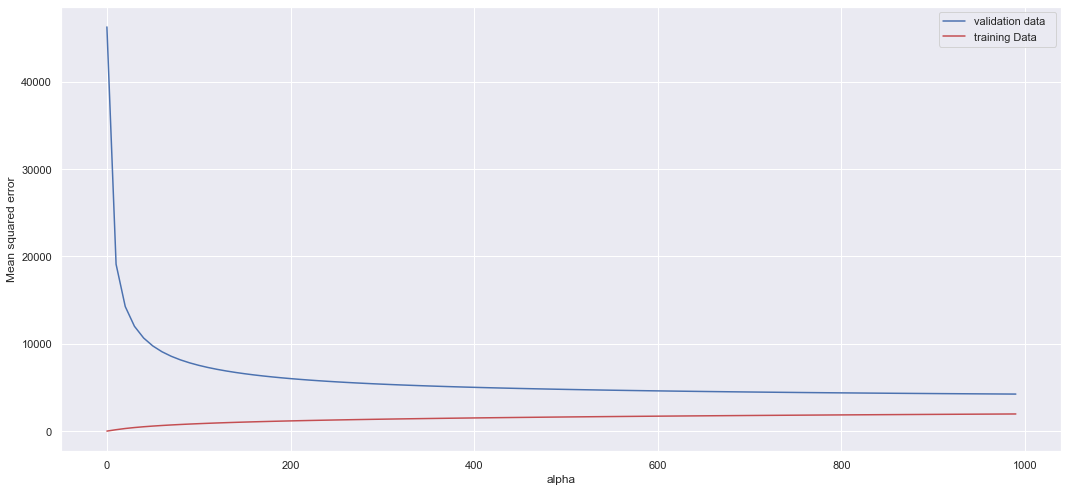

In [82]:
width = 15
height = 7
plt.figure(figsize=(width, height))

plt.plot(ALFA,mse_test, label='validation data  ')
plt.plot(ALFA, mse_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.legend()
plt.tight_layout()

We can see that the mean squared error has dropped for test set considerably somewhere around 200. The mean squared error for the test set keeps decreasing for the test set as alpha increases, however, the mean squared error increases slightly for train set with increase in alpha. After trying couple of values for the regularization parameter between 50 and 500, 400 was chosen as the optimum value of regularization parameter (alpha) for making a Ridge object and then fit the training set to the Ridge object which is then used to predict the values for the test data set and is used to calculate the Rsquared value and the mean squared error on the train and test set.

In [83]:
RigeModel = Ridge(alpha=400) 
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=400, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### Insample Testing: The Rsquared value for the training data set

In [84]:
RigeModel.score(x_train_pr,y_train)

0.7665124490527735

#### Predicting the output values on the training set with the new Ridge model:

In [85]:
yhat_pr_train= RigeModel.predict(x_train_pr)

#### Mean squared error on the train set:

In [86]:
mse(yhat_pr_train, y_train)

1506.149183645521

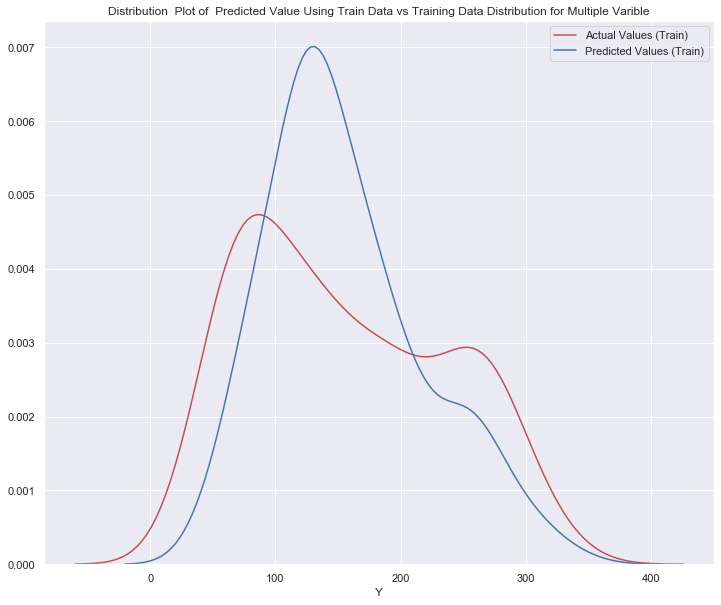

In [87]:
Title = 'Distribution  Plot of  Predicted Value Using Train Data vs Training Data Distribution for Multiple Varible'
DistributionPlot(y_train, yhat_pr_train, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

#### Out of Sample Testing: The Rsquared value for the test data set:

In [88]:
RigeModel.score(x_test_pr,y_test)

0.04584134656899119

#### Predicting the output value on the test data set with new Ridge model:

In [89]:
yhat_pr_test = RigeModel.predict(x_test_pr)

#### The Mean squared error for the test data set

In [90]:
mse(yhat_pr_test, y_test)

5010.250393536592

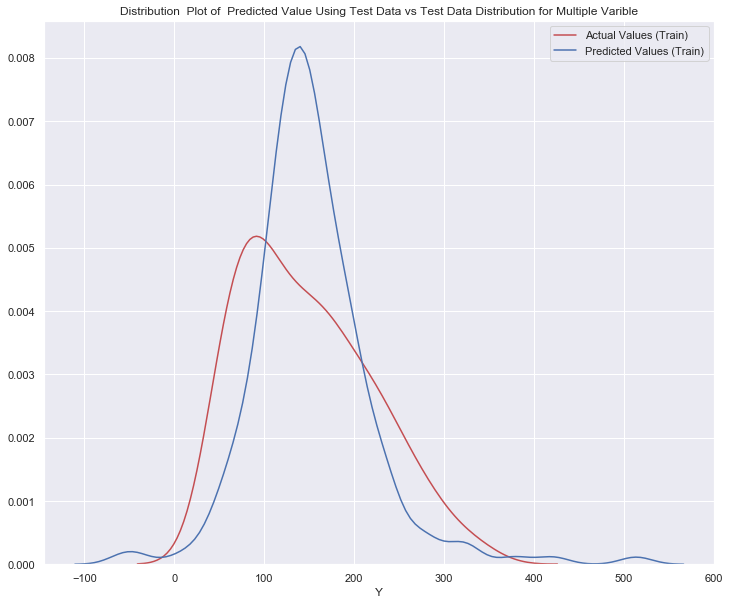

In [91]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Test Data Distribution for Multiple Varible'
DistributionPlot(y_test, yhat_pr_test, "Actual Values (Train)", "Predicted Values (Train)", Title)
sns.set(font_scale=1.0)

### Results:


<h3>Results have been displayed in the following table:</h3>
<img src="diab_result_1.JPG" alt="Italian Trulli">


### Conclusion:
#### The BMI and diabetes progression seems to have a strong positive linear relationship as seen from the correlation heatmap which shows that obesity and diabetes progression is linearly related to each other. Increase in one leads to the increase in the other.
#### From the above, we can see that Rsquared value of the training set is the highest in Unregularized polynomial regression model. However, the model failed to generalize well on the test set. 
#### However, after regularization, We can see that the error has greatly reduced in the test data model from unregularized polynomial regression model. The mean squared error for the unregularized polynomial model was 46278.2 whereas the mean squared error for the regularized model is 5010.3.
#### The Rsquared value has decreased increased from -7.8 to 0.05. Based on the above results we conclude that the Regularized polynomial regression model is better than Unegularized model. However, it may not be the best model because the out of sample evaluation on the test set shows a larger mean squared error in Polynomial regression model (5010.3) as compared to multivariable linear regression model (3228.7). The insample evaluation on the train set shows smaller mean squared error for Polynomial regression model (1506.1) as compared to Multivariable linear regression model (2768.5). Therefore, it seems like multivarible linear regression model generalizes better on new examples for prediction than the regularized polynomial regression model for predicting the progression of diabetes in one year from baseline  based on different factors such as BMI, BP, Age, Sex and blood serum concentrations. 